In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
training_data = pd.read_csv('../../data/TP2/train.csv', usecols=['id','precio'])

In [3]:
def load_features(list_of_features, features_list):
    for feature in features_list:
        test_ftr = pd.read_csv('../../res/ftr/'+feature+'_train.csv')
        train_df = training_data.merge(test_ftr, on='id', how='inner').drop(columns=['Unnamed: 0'])
        list_of_features.append(train_df)
    
features_array = ['avenida_in_direction', 
                  'avenida_in_description',
                  'qualificative_adjectives_in_description',
                  'amueblado', 
                  'encoded_type_of_idzone',
                  'garden_in_description',
                  'is_a_capital', 
                  'new_parts_of_the_house', 
                  'security_words_in_description',
                  'mean_precio_encoded_type_of_agglomeration',
                 'mean_idzona_price',
                 'type_of_agglomeration',
                 'margination_degree',
                 'rezago_degree',
                 'murder_rate_of_entity',
                 'metros_totales_y_cubiertos_log',
                 'touristic_city',
                 'surface_features']
features = []
load_features(features, features_array)

# Precio de una propiedad ubicada en una avenida

In [4]:
avenida_in_direction = features[0]
avenida_in_direction.head()

,id,precio,avenida_in_direction
0,254099,2273000.0,1
1,53461,3600000.0,1
2,247984,1200000.0,0
3,209067,650000.0,0
4,185997,1150000.0,0


([<matplotlib.axis.XTick at 0x19e24dfcf08>,
 <a list of 2 Text xticklabel objects>)

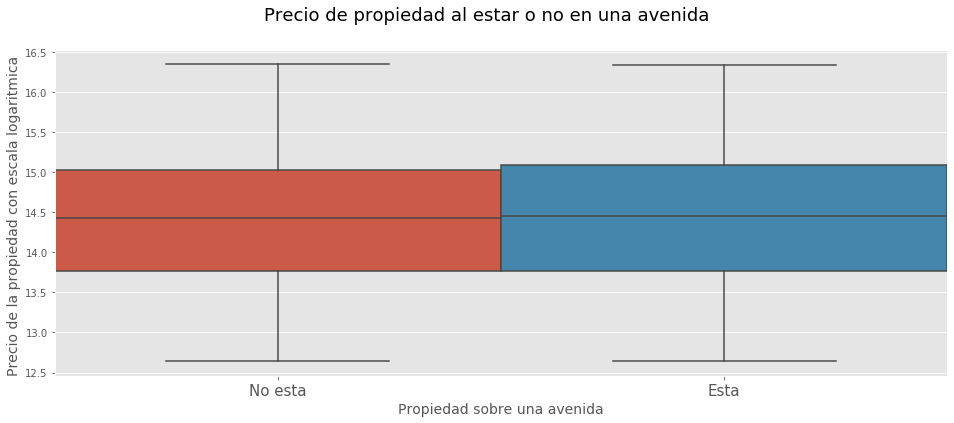

In [5]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x = avenida_in_direction.avenida_in_direction, y = np.log(avenida_in_direction.precio) , width = 1)
plt.suptitle('Precio de propiedad al estar o no en una avenida', fontsize=18)
plt.xlabel("Propiedad sobre una avenida", fontsize = 14)
plt.ylabel("Precio de la propiedad con escala logaritmica ", fontsize = 14)
plt.xticks([0,1], ['No esta', 'Esta'],fontsize=15)

# Precio de una propiedad con seguridad

In [6]:
seguridad = features[8]
seguridad.head()

,id,precio,seguridad
0,254099,2273000.0,0
1,53461,3600000.0,0
2,247984,1200000.0,1
3,209067,650000.0,1
4,185997,1150000.0,0


([<matplotlib.axis.XTick at 0x19e23b566c8>,
 <a list of 2 Text xticklabel objects>)

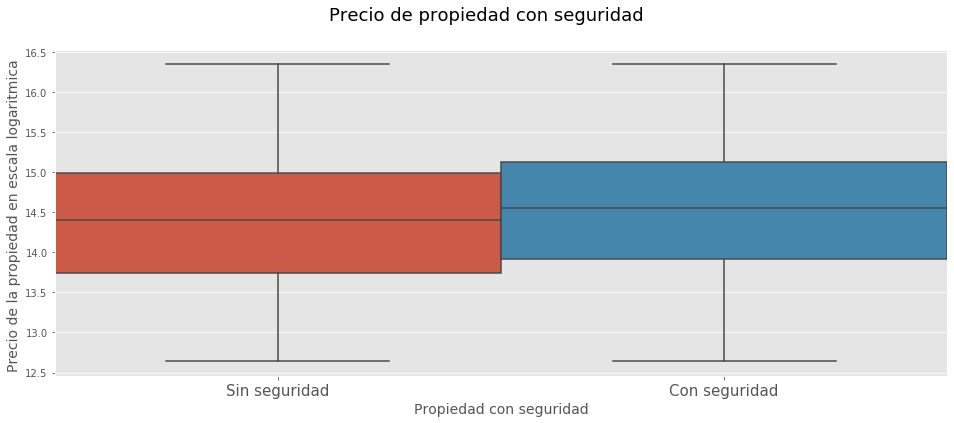

In [7]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x = seguridad.seguridad, y = np.log(seguridad.precio) , width = 1)
plt.suptitle('Precio de propiedad con seguridad', fontsize=18)
plt.xlabel("Propiedad con seguridad", fontsize = 14)
plt.ylabel("Precio de la propiedad en escala logaritmica ", fontsize = 14)
plt.xticks([0,1], ['Sin seguridad', 'Con seguridad'],fontsize=15)

# Precio en funcion del precio promedio de la idzona

In [8]:
mean_price_idzone = features[10]
mean_price_idzone.head()

,id,precio,precio_por_metro
0,254099,2273000.0,23256.837144
1,53461,3600000.0,15614.908380
2,247984,1200000.0,8441.101152
3,209067,650000.0,9857.301547
4,185997,1150000.0,13804.584787


In [9]:
mean_price_idzone['precio'] = mean_price_idzone.groupby('precio_por_metro').transform(lambda x: x.mean())

In [10]:
mean_price_idzone.precio.nunique()

6633

In [11]:
mean_price_idzone.precio_por_metro.nunique()

6636

Text(0, 0.5, 'Precio de la propiedad en miles de pesos mexicanos')

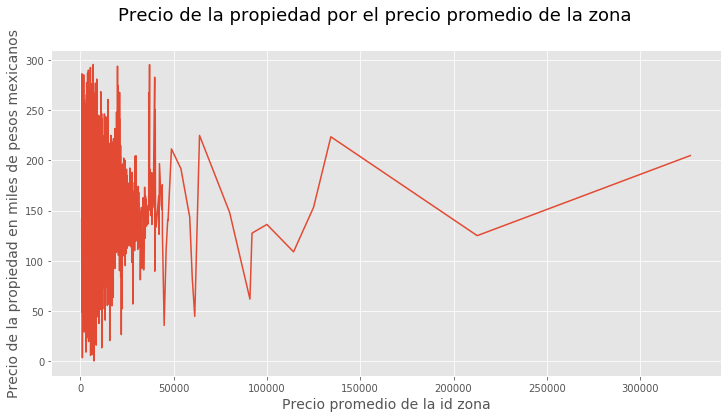

In [12]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x = mean_price_idzone.precio_por_metro, y = mean_price_idzone.precio/1000)
plt.suptitle('Precio de la propiedad por el precio promedio de la zona', fontsize=18)
plt.xlabel("Precio promedio de la id zona", fontsize = 14)
plt.ylabel("Precio de la propiedad en miles de pesos mexicanos", fontsize = 14)

# Precio en funcion del precio medio del tipo de ciudad

In [13]:
mean_price_agglomeration = features[9]
mean_price_agglomeration.head()

,id,precio,mean_precio_encoded_type_of_agglomeration
0,254099,2273000.0,3.471705e+06
1,53461,3600000.0,3.471705e+06
2,247984,1200000.0,2.410765e+06
3,209067,650000.0,2.410765e+06
4,185997,1150000.0,2.410765e+06


In [14]:
mean_price_agglomeration['precio'] = mean_price_agglomeration.groupby('mean_precio_encoded_type_of_agglomeration').transform(lambda x: x.mean())

In [15]:
mean_price_agglomeration.precio.nunique()

5

In [16]:
mean_price_agglomeration.mean_precio_encoded_type_of_agglomeration.nunique()

5

Text(0, 0.5, 'Precio de la propiedad (k$)')

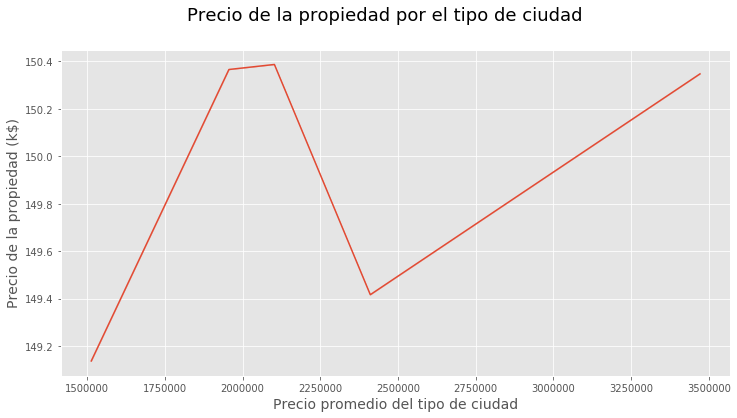

In [17]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x = mean_price_agglomeration.mean_precio_encoded_type_of_agglomeration, y = mean_price_agglomeration.precio/1000)
plt.suptitle('Precio de la propiedad por el tipo de ciudad', fontsize=18)
plt.xlabel("Precio promedio del tipo de ciudad", fontsize = 14)
plt.ylabel("Precio de la propiedad (k$)", fontsize = 14)

# Precio segun el tipo de ciudad
Este feature me doy cuenta que es malo, dado que por falta de datos sobre lo que investigue me dice que la zona rural tiene mayor precio que una ciudad mediana y no tiene sentido.

In [18]:
type_of_agglomeration = features[11]
type_of_agglomeration.head()

,id,precio,tipo_de_aglomeracion
0,254099,2273000.0,megaciudad
1,53461,3600000.0,megaciudad
2,247984,1200000.0,ciudad_rural
3,209067,650000.0,ciudad_rural
4,185997,1150000.0,ciudad_rural


Text(0, 0.5, 'Precio de la propiedad en miles de pesos mexicanos')

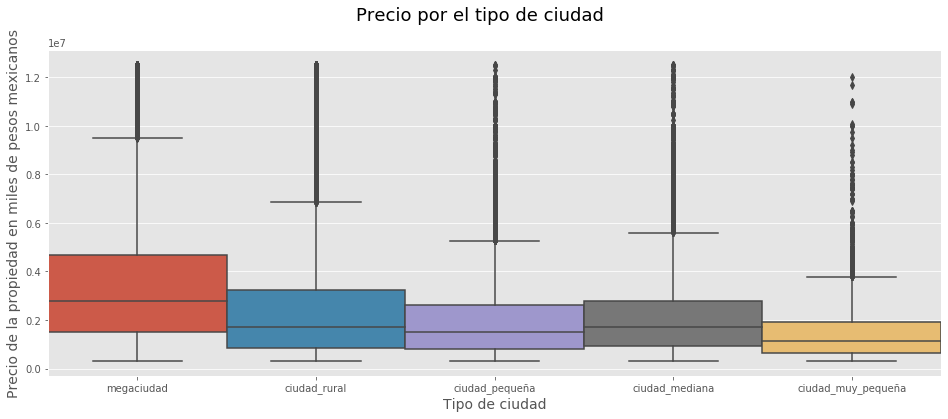

In [19]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x = type_of_agglomeration.tipo_de_aglomeracion, y = type_of_agglomeration.precio , width = 1)
plt.suptitle('Precio por el tipo de ciudad', fontsize=18)
plt.xlabel("Tipo de ciudad", fontsize = 14)
plt.ylabel("Precio de la propiedad en miles de pesos mexicanos", fontsize = 14)

# Precio en funcion del grado de marginacion 
El índice de Marginación (IM) es una medida-resumen que permite diferenciar entidades federativas y municipios de acuerdo con las carencias que padece la población, como resultado de la falta de acceso a la educación, la residencia en viviendas inadecuadas, la percepción de ingresos monetarios insuficientes

In [20]:
margination_degree = features[12]
margination_degree.head()

,id,precio,grado_de_marginacion
0,254099,2273000.0,Muy bajo
1,53461,3600000.0,Alto
2,247984,1200000.0,Alto
3,209067,650000.0,Alto
4,185997,1150000.0,Alto


Text(0, 0.5, 'Precio de la propiedad en miles de pesos mexicanos')

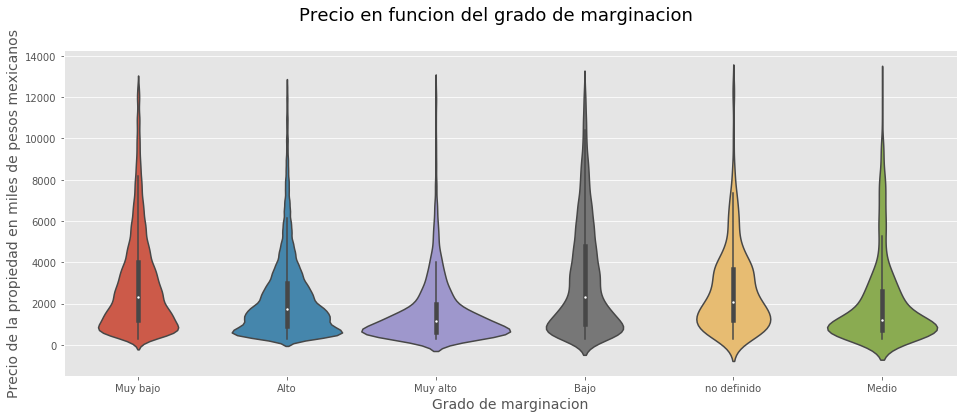

In [21]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x = margination_degree.grado_de_marginacion, y = margination_degree.precio/1000 , width = 1)
plt.suptitle('Precio en funcion del grado de marginacion', fontsize=18)
plt.xlabel("Grado de marginacion", fontsize = 14)
plt.ylabel("Precio de la propiedad en miles de pesos mexicanos", fontsize = 14)

# Precio en funcion del grado de rezago social
El Índice de Rezago Social es una medida ponderada que resume cuatro indicadores de carencias sociales (educación, salud, servicios básicos y espacios en la vivienda) 

In [22]:
rezago_degree = features[13]
rezago_degree.head()

,id,precio,grado_rezago_social
0,254099,2273000.0,Muy bajo
1,53461,3600000.0,Bajo
2,247984,1200000.0,Muy bajo
3,209067,650000.0,Bajo
4,185997,1150000.0,Muy bajo


Text(0, 0.5, 'Precio de la propiedad en miles de pesos mexicanos ')

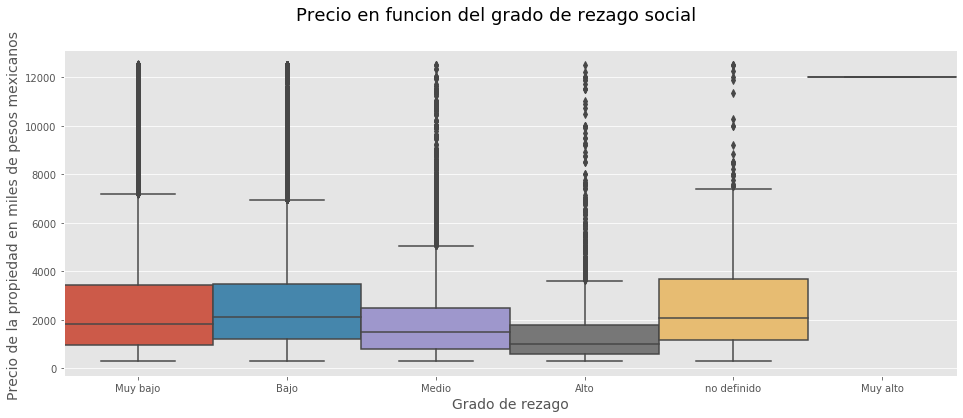

In [23]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x = rezago_degree.grado_rezago_social, y = rezago_degree.precio/1000 , width = 1)
plt.suptitle('Precio en funcion del grado de rezago social', fontsize=18)
plt.xlabel("Grado de rezago", fontsize = 14)
plt.ylabel("Precio de la propiedad en miles de pesos mexicanos ", fontsize = 14)

In [24]:
rezago_degree.grado_rezago_social.value_counts()

Muy bajo       169926
Bajo            49348
Medio           16689
Alto             3230
no definido       806
Muy alto            1
Name: grado_rezago_social, dtype: int64

# Precio en funcion de la frecuencia de homicidios

In [25]:
murder_rate = features[14]
murder_rate.head()

,id,precio,murder_rate_of_entity
0,254099,2273000.0,9.666667
1,53461,3600000.0,9.666667
2,247984,1200000.0,13.500000
3,209067,650000.0,10.333333
4,185997,1150000.0,13.500000


Text(0, 0.5, 'Precio de la propiedad en miles de pesos mexicanos')

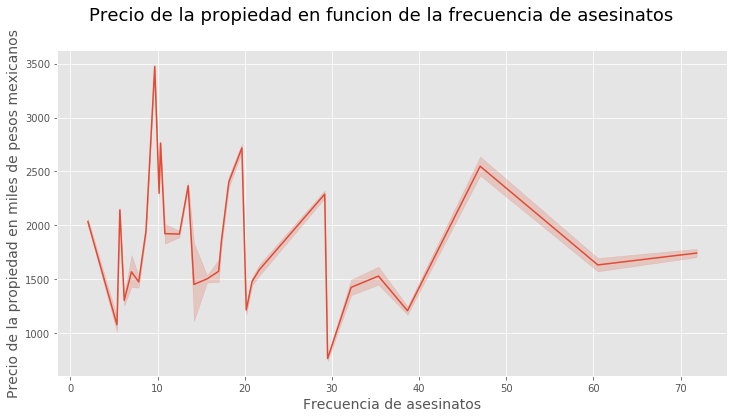

In [26]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x = murder_rate.murder_rate_of_entity, y = murder_rate.precio/1000)
plt.suptitle('Precio de la propiedad en funcion de la frecuencia de asesinatos', fontsize=18)
plt.xlabel("Frecuencia de asesinatos", fontsize = 14)
plt.ylabel("Precio de la propiedad en miles de pesos mexicanos", fontsize = 14)

# Precio en funcion de los metros cubiertos y los totales en escala log

In [27]:
metros_log = features[15]
metros_log.head()

,id,precio,metroscubiertos_log,metrostotales_log
0,254099,2273000.0,4.382027,4.382027
1,53461,3600000.0,5.590987,5.192957
2,247984,1200000.0,4.969813,5.111988
3,209067,650000.0,4.143135,4.204693
4,185997,1150000.0,4.553877,4.553877


Text(0, 0.5, 'Precio de la propiedad en miles de pesos mexicanos')

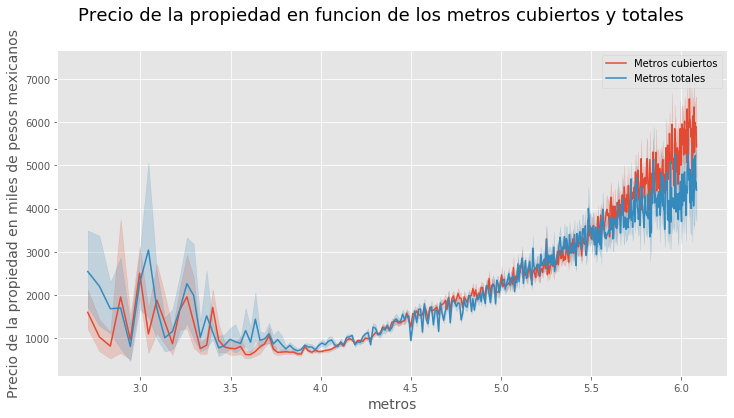

In [28]:
plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(x = metros_log.metroscubiertos_log , y = metros_log.precio/1000, label='Metros cubiertos')
ax2 = sns.lineplot(x = metros_log.metrostotales_log , y = metros_log.precio/1000, label='Metros totales')
plt.suptitle('Precio de la propiedad en funcion de los metros cubiertos y totales', fontsize=18)
plt.xlabel("metros", fontsize = 14)
plt.legend()
plt.ylabel("Precio de la propiedad en miles de pesos mexicanos", fontsize = 14)

# Precio en funcion del tipo de turismo en la ciudad

In [29]:
touristic_city = features[16]
touristic_city['touristic_beach'] = touristic_city['touristic_beach'].apply(lambda x: 'playa' if x==1 else 'no playa')
touristic_city['touristic_city'] = touristic_city['touristic_city'].apply(lambda x: 'ciudad' if x==1 else 'no ciudad')
touristic_city['tipo_de_turismo'] = touristic_city['touristic_beach'] + ' y ' + touristic_city['touristic_city']
touristic_city.head()

,id,precio,touristic_beach,touristic_city,tipo_de_turismo
0,254099,2273000.0,no playa,no ciudad,no playa y no ciudad
1,53461,3600000.0,no playa,no ciudad,no playa y no ciudad
2,247984,1200000.0,playa,no ciudad,playa y no ciudad
3,209067,650000.0,no playa,no ciudad,no playa y no ciudad
4,185997,1150000.0,no playa,no ciudad,no playa y no ciudad


Text(0, 0.5, 'Precio de la propiedad en miles de pesos mexicanos')

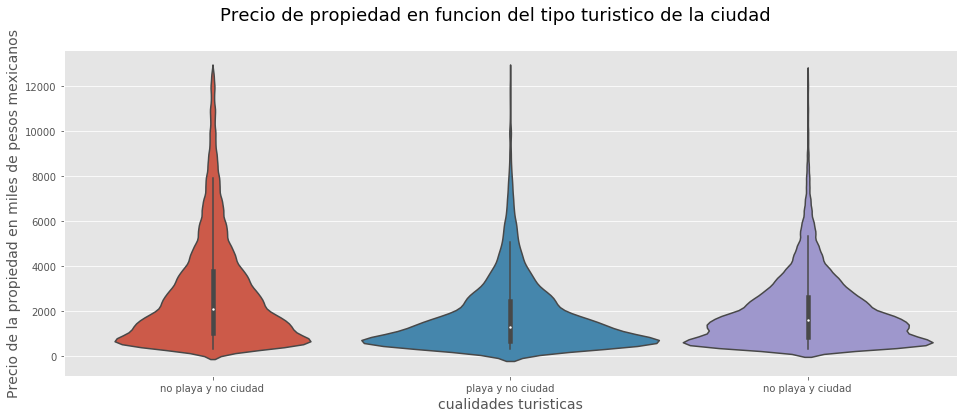

In [33]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x = touristic_city.tipo_de_turismo, y = touristic_city.precio/1000 , width = 1)
plt.suptitle('Precio de propiedad en funcion del tipo turistico de la ciudad', fontsize=18)
plt.xlabel("cualidades turisticas", fontsize = 14)
plt.ylabel("Precio de la propiedad en miles de pesos mexicanos", fontsize = 14)

# Precio en funcion de los surfaces

In [31]:
surface = features[17]
surface.head()

,id,precio,metrostotalesporhabitacion,metroscubiertosporhabitacion,metroscubiertossobretotales,metrosdescubiertos
0,254099,2273000.0,40.000000,40.000000,1.000000,0.0
1,53461,3600000.0,60.000000,89.333333,1.488889,-88.0
2,247984,1200000.0,55.333333,48.000000,0.867470,22.0
3,209067,650000.0,33.500000,31.500000,0.940299,4.0
4,185997,1150000.0,47.500000,47.500000,1.000000,0.0


Text(0, 0.5, 'Precio de la propiedad en miles de pesos mexicanos')

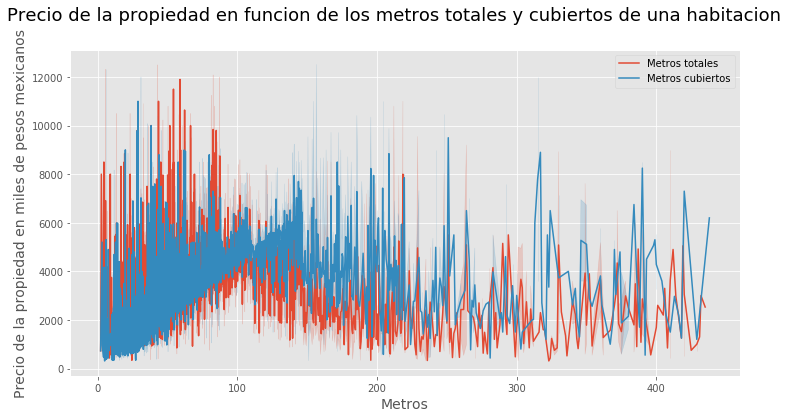

In [34]:
plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(x = surface.metrostotalesporhabitacion , y = surface.precio/1000, label='Metros totales')
ax2 = sns.lineplot(x = surface.metroscubiertosporhabitacion , y = surface.precio/1000, label='Metros cubiertos')
plt.suptitle('Precio de la propiedad en funcion de los metros totales y cubiertos de una habitacion', fontsize=18)
plt.xlabel("Metros", fontsize = 14)
plt.ylabel("Precio de la propiedad en miles de pesos mexicanos", fontsize = 14)